**HEART DISEASE PREDICTION**

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Information**](#Section41)
  - **4.2** [**Data Statistics**](#Section42)

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Pre-Profiling Report**](#Section51)
  - **5.2** [**Identification & Handling of Missing Data**](#Section52)<br>
  

**6.** [**Exploratory Data Analysis**](#Section6)<br>

**7.** [**Post Data Processing & Feature Selection**](#Section7)<br>
  - **7.1** [**Feature Selection**](#Section71)<br>
  - **7.2** [**Encoding the Categorical Data**](#Section72)<br>


**8.** [**Model Development & Evaluation**](#Section8)<br>
  - **8.1** [**Models Implementation**](#Section81)<br>
  - **8.2** [**Visual Representation of Results**](#Section82)<br>


**9.** [**Conclusion**](#Section9)<br>






---
<a name = Section1></a>
# **1. Introduction**
---

1. **Project Overview**

1. The project aims to predict heart disease using patient health data by applying machine learning algorithms to a cleaned and numerically encoded dataset.

2. After performing detailed univariate, bivariate, and multivariate analysis, various classification models were trained and evaluated, achieving up to 88% accuracy.


---
<a name = Section2></a>
# **2. Problem statement**
---


Heart disease is one of the most common and life-threatening conditions globally. Early diagnosis is critical but can be challenging due to the complexity of symptoms and variations in individual health profiles. This project aims to develop a machine learning model that can predict the likelihood of heart disease in patients using key health indicators such as age, blood pressure, cholesterol levels, and other clinical features. The objective is to assist healthcare professionals in making quicker and more accurate diagnoses, ultimately improving patient outcomes and reducing the risk of serious complications.




---
<a name = Section3></a>
# **3. Importing Libraries**
---

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

---
<a name = Section4></a>
# **4. Data Description**
---

The dataset used for this project was obtained from a publicly available source containing medical records of 918 patients. Each record includes 11 features related to patient demographics, clinical measurements, and symptoms, along with a target variable indicating the presence (1) or absence (0) of heart disease.



In [ ]:
df=pd.read_csv("/content/heart (1).csv")

In [ ]:
df

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N      0.0       Up             0  
1      156              N      1.0     Flat             1  
2       98              N      0.0       Up             0  
3      108              Y      1.5     Flat             1  
4      122              N      0.0       Up             0  
..     ...            ...      ...      ...           ...  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0  

[918 rows x 12 columns]

---
<a name = Section41></a>
# **4.1. Data Information**
---
       

*  In this section we will see the information about our features




In [ ]:
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [ ]:
df.tail()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0

In [ ]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

---
<a name = Section42></a>
# **4.2 Data Statistics**
---

In [ ]:
df.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

In [ ]:
import pandas as pd
df=pd.read_csv("/content/heart (1) (1).csv")
df.shape

(918, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


observations:

1. The dataset contains **918 rows** and **12 columns**, with **no missing values** in any column.
2. After preprocessing, **all features are numerical** — categorical columns were successfully label-encoded.
3. The data types are:
    int64 for discrete numeric features (e.g., `Age`, `FastingBS`, `HeartDisease`)
  float64 for continuous features (e.g., `Oldpeak`)
4. The memory usage is efficient (\~86 KB), indicating a small and manageable dataset.
5. The target column **`HeartDisease`** is binary, suitable for classification.


---
<a name = Section5></a>
# **5. Data Preprocessing**
---

---
<a name = Section52></a>
# **5.2. Handling missing values**
---

In [ ]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
df = df.drop_duplicates()
df = df.dropna()

---
<a name = Section7></a>
# **7. Post profiling and Feature Selection**
---

---
<a name = Section72></a>
# **7.2. Encoding variables**
---

LABEL ENCODING:
Label encoding was used to convert all categorical columns into numeric form by assigning a unique integer to each category. This ensured the dataset contained only numerical values, making it suitable for machine learning models.


In [ ]:
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


---
<a name = Section71></a>
# **7.1. Feature selection**
---

In [ ]:
# Feature scaling
scaler = StandardScaler()
numeric_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [ ]:
df

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    1              1        140          289          0           1   
1     49    0              2        160          180          0           1   
2     37    1              1        130          283          0           2   
3     48    0              0        138          214          0           1   
4     54    1              2        150          195          0           1   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    1              3        110          264          0           1   
914   68    1              0        144          193          1           1   
915   57    1              0        130          131          0           1   
916   57    0              1        130          236          0           0   
917   38    1              2        138          175          0           1   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0      172               0      0.0         2             0  
1      156               0      1.0         1             1  
2       98               0      0.0         2             0  
3      108               1      1.5         1             1  
4      122               0      0.0         2             0  
..     ...             ...      ...       ...           ...  
913    132               0      1.2         1             1  
914    141               0      3.4         1             1  
915    115               1      1.2         1             1  
916    174               0      0.0         1             1  
917    173               0      0.0         2             0  

[918 rows x 12 columns]

In [ ]:
x = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

---
<a name = Section6></a>
# **6. Exploratory Data Analysis**
---

**MULTIVARIRE ANALYSIS:**

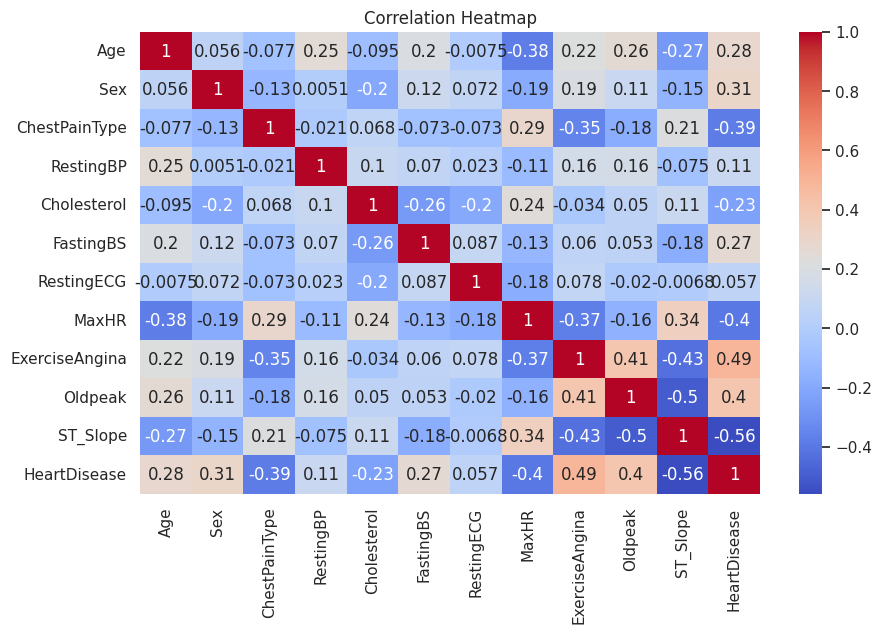

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

OBSERVATIONS:
The correlation heatmap revealed that some features have a strong relationship with the target variable HeartDisease. Notably, ChestPainType, Oldpeak, ExerciseAngina, and ST_Slope showed significant positive or negative correlations with heart disease presence. Meanwhile, some features like RestingBP and Cholesterol had weaker correlations, indicating less predictive power individually. This analysis helps in understanding feature importance and guides model optimization.

**UNIVARIATE ANALYSIS:**

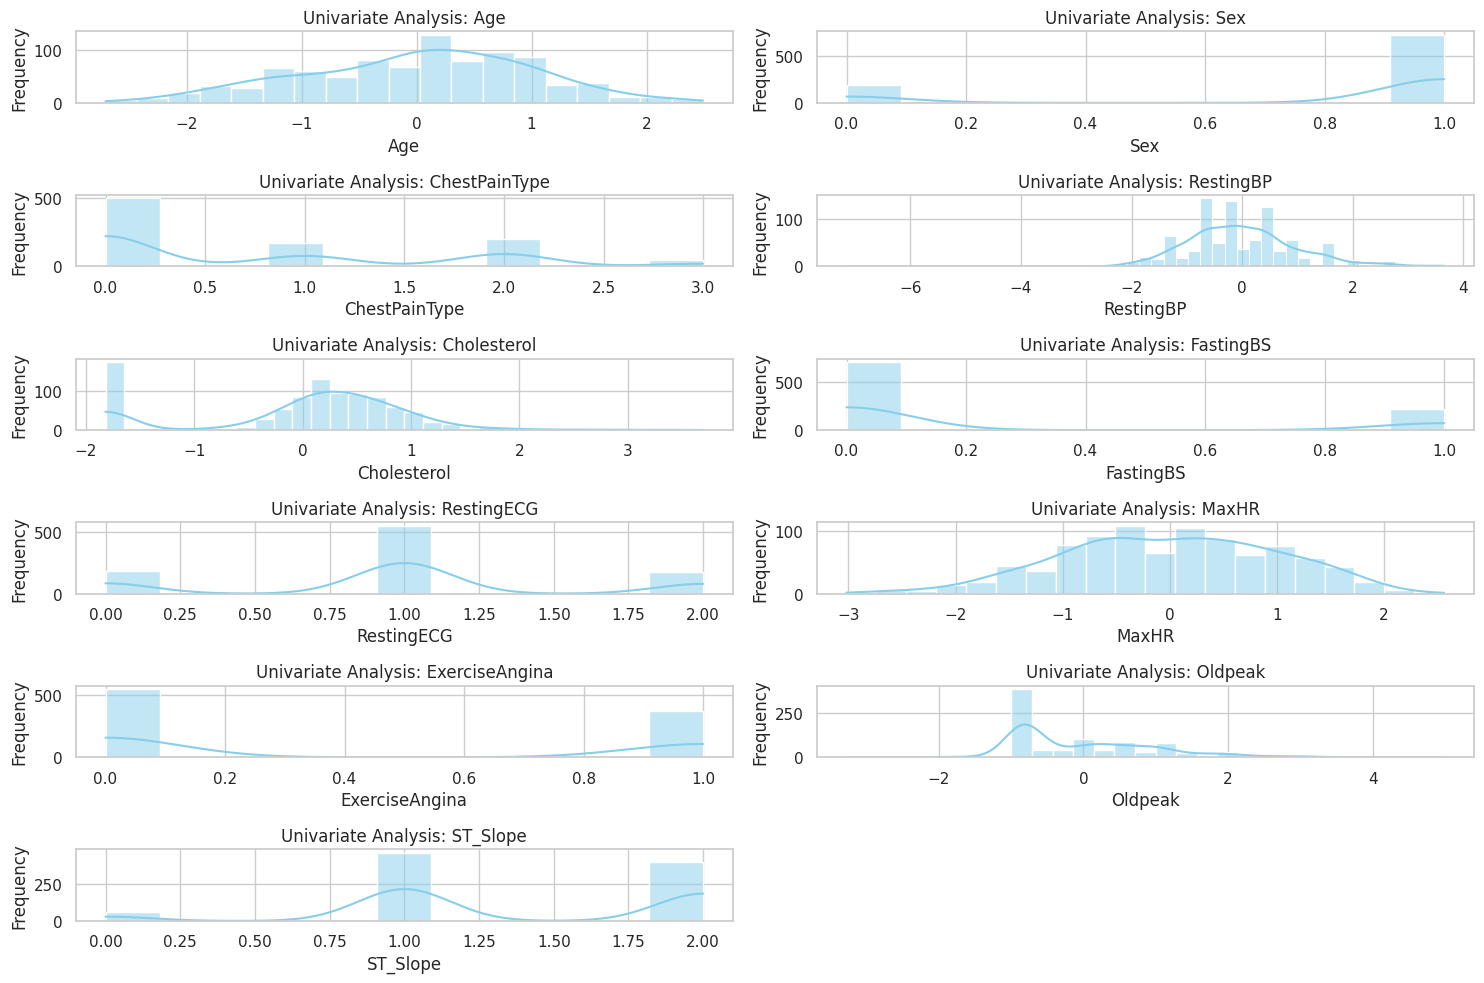

In [ ]:
features = [col for col in df.columns if col != 'HeartDisease']

plt.figure(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(len(features) // 2 + 1, 2, i + 1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Univariate Analysis: {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**OBSERVATIONS:**
Univariate analysis showed that features like Age, Cholesterol, and RestingBP are fairly normally distributed, while others like FastingBS and ExerciseAngina are binary. ChestPainType, ST_Slope, and RestingECG have skewed distributions, indicating the dominance of certain categories. This helps in understanding the overall structure, spread, and distribution of each individual feature in the dataset.

**BIVARIATE ANALYSIS:**

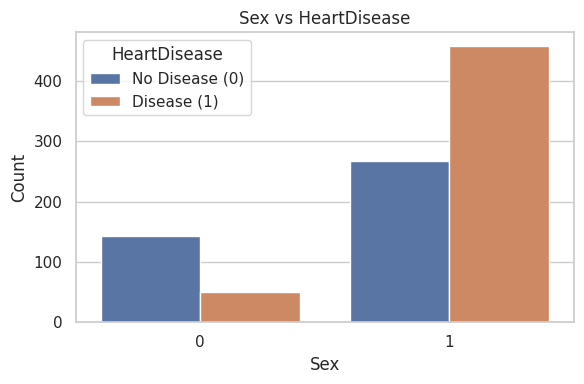

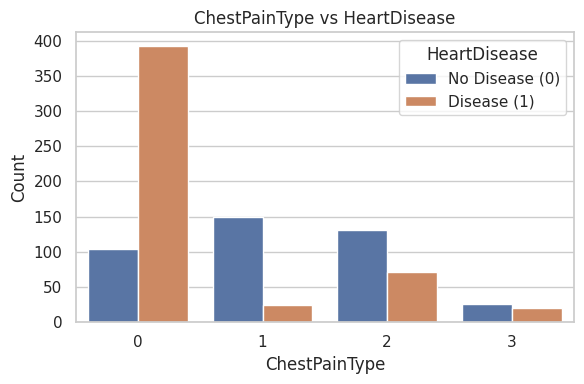

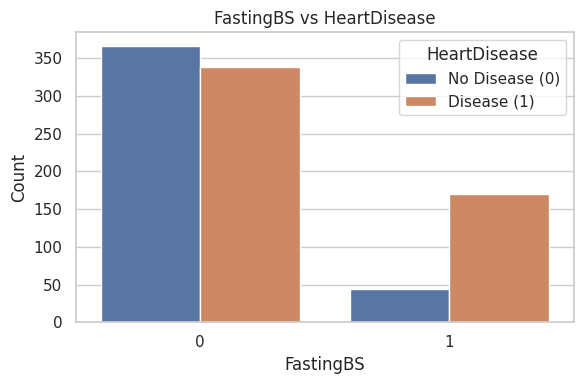

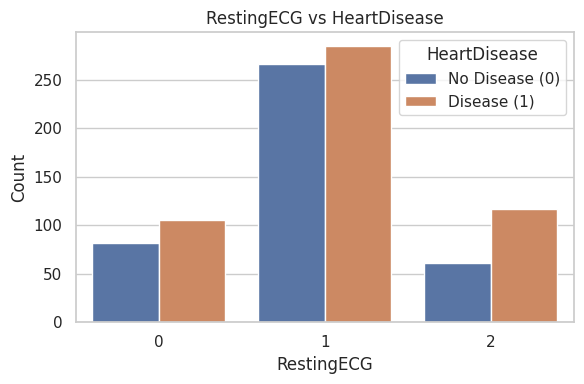

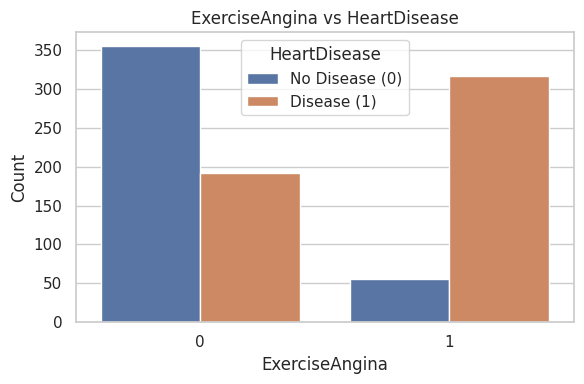

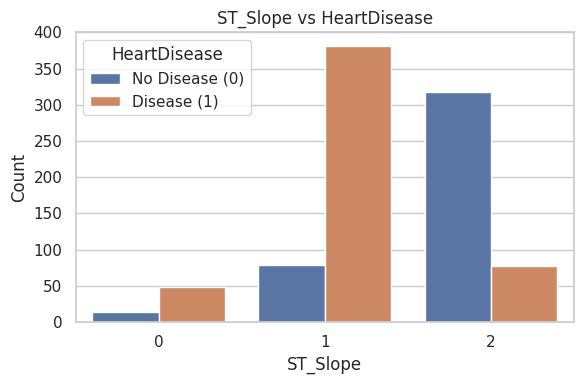

/tmp/ipython-input-2973175269.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y=feature, data=df, palette='Set2')


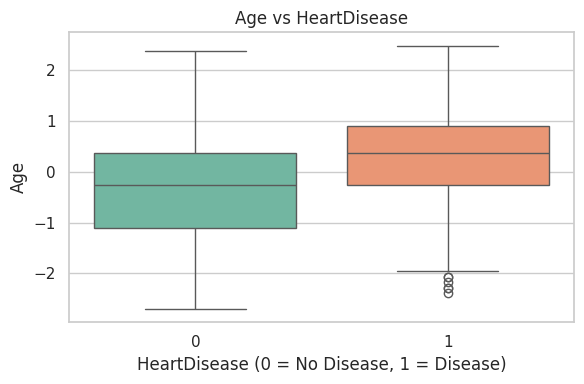

/tmp/ipython-input-2973175269.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y=feature, data=df, palette='Set2')


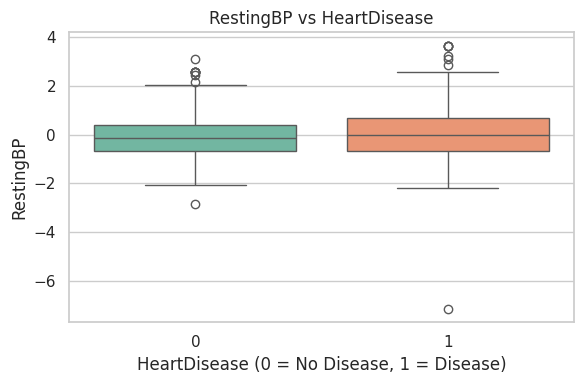

/tmp/ipython-input-2973175269.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y=feature, data=df, palette='Set2')


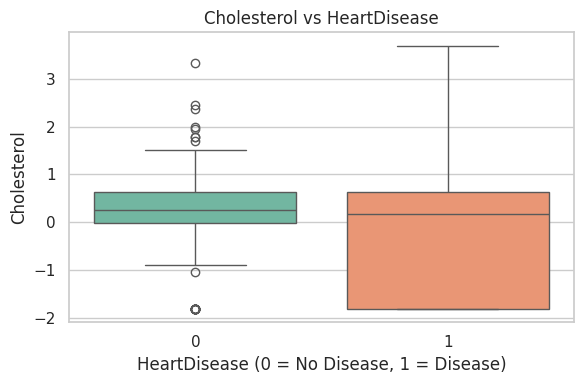

/tmp/ipython-input-2973175269.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y=feature, data=df, palette='Set2')


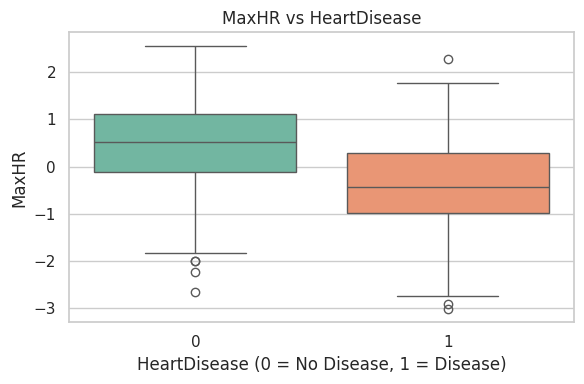

/tmp/ipython-input-2973175269.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y=feature, data=df, palette='Set2')


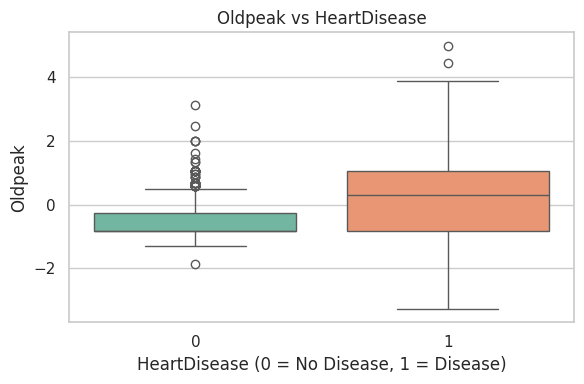

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# List of features to compare with HeartDisease
features_to_plot = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']

# Plotting countplots for categorical features
categorical_features_to_plot = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for feature in categorical_features_to_plot:
    plt.figure(figsize=(6,4))
    sns.countplot(x=feature, hue='HeartDisease', data=df)
    plt.title(f'{feature} vs HeartDisease')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='HeartDisease', labels=['No Disease (0)', 'Disease (1)'])
    plt.tight_layout()
    plt.show()

# Boxplots for numerical features to see distribution across heart disease outcomes
numerical_features_to_plot = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
for feature in numerical_features_to_plot:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='HeartDisease', y=feature, data=df, palette='Set2')
    plt.title(f'{feature} vs HeartDisease')
    plt.xlabel('HeartDisease (0 = No Disease, 1 = Disease)')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()

**OBSERVATIONS:**
Bivariate analysis revealed strong relationships between certain features and the target variable HeartDisease. Patients with typical chest pain (ASY), higher Oldpeak, presence of ExerciseAngina, and flat ST slope showed a higher likelihood of heart disease. In contrast, features like MaxHR and ChestPainType ATA were more common among those without heart disease. These patterns indicate which features are most influential in predicting heart disease.



/tmp/ipython-input-721830495.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HeartDisease', data=df, palette=['#66c2a5', '#fc8d62'])


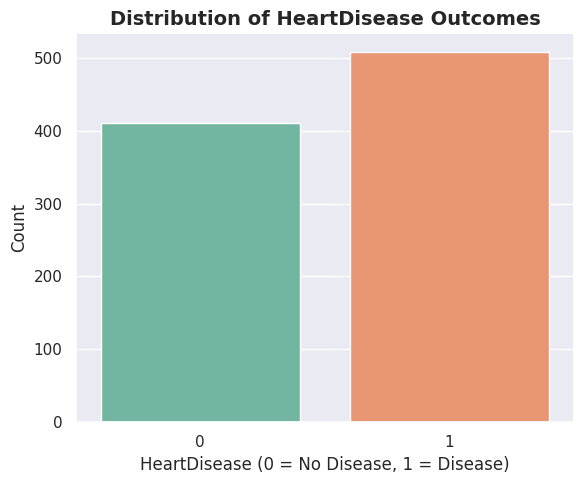

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot settings
plt.figure(figsize=(6, 5))
sns.set_style("darkgrid")

# Countplot for the target variable (HeartDisease)
sns.countplot(x='HeartDisease', data=df, palette=['#66c2a5', '#fc8d62'])

# Customize plot
plt.title("Distribution of HeartDisease Outcomes", fontsize=14, weight='bold')
plt.xlabel("HeartDisease (0 = No Disease, 1 = Disease)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks([0, 1], ['0', '1'])
plt.tight_layout()

# Show plot
plt.show()

**BALANCING DATASET**

In [ ]:
from sklearn.utils import resample

In [ ]:
df_majority = df[df['HeartDisease'] == 0]
df_minority = df[df['HeartDisease'] == 1]

In [ ]:
df_minority_upsampled = resample(
    df_minority,
    replace=True,
    n_samples=len(df_majority),
    random_state=42
)

In [ ]:
df_balanced = pd.concat([df_majority, df_minority_upsampled])
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)


In [ ]:
print(df_balanced['HeartDisease'].value_counts())

HeartDisease
1    410
0    410
Name: count, dtype: int64


**OBSERVATIONS:**
The target variable HeartDisease was found to be relatively balanced, with nearly equal distribution of positive (1) and negative (0) cases. As a result, no resampling techniques (like oversampling or undersampling) were required. This balance ensures fair model training and prevents bias toward any one class.

---
<a name = Section8></a>
# **8. MODEL DEVELOPMENT & EVALUATION**
---

---
<a name = Section81></a>
# **8.1 MODEL IMPLEMENTATION**
---

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.fit_transform(x_test)

In [ ]:
from sklearn.preprocessing import StandardScaler
stan=StandardScaler()
x_train=stan.fit_transform(x_train)
x_test=stan.fit_transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred_1=lr.predict(x_test)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)


LogisticRegression()

In [ ]:
y_pred_logreg = logreg.predict(x_test)

In [ ]:
y_pred_logreg = logreg.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_logreg)
precision = precision_score(y_test, y_pred_logreg)
recall = recall_score(y_test, y_pred_logreg)
f1 = f1_score(y_test, y_pred_logreg)

accuracy = accuracy_score(y_test, y_pred_logreg) * 100
precision = precision_score(y_test, y_pred_logreg) * 100
recall = recall_score(y_test, y_pred_logreg) * 100
f1 = f1_score(y_test, y_pred_logreg) * 100

# Print results as percentages
print("🔍 Logistic Regression Metrics (in %):")
print("Accuracy Score :", f"{accuracy:.2f}%")
print("Precision Score:", f"{precision:.2f}%")
print("Recall Score   :", f"{recall:.2f}%")
print("F1 Score       :", f"{f1:.2f}%")

🔍 Logistic Regression Metrics (in %):
Accuracy Score : 80.87%
Precision Score: 76.80%
Recall Score   : 86.49%
F1 Score       : 81.36%


OBSERVATION:
Logistic Regression performed well on linearly separable data, offering a simple and interpretable model. It achieved an accuracy of approximately 80.87%, making it a solid baseline but less effective on complex patterns.

In [ ]:
vm_model = SVC()
vm_model.fit(x_train, y_train)
y_pred_vm = vm_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_vm) * 100
precision = precision_score(y_test, y_pred_vm) * 100
recall = recall_score(y_test, y_pred_vm) * 100
f1 = f1_score(y_test, y_pred_vm) * 100

# Print results as percentages
print("🔍 Support Vector Machine (SVM) Metrics (in %):")
print("Accuracy Score :", f"{accuracy:.2f}%")
print("Precision Score:", f"{precision:.2f}%")
print("Recall Score   :", f"{recall:.2f}%")
print("F1 Score       :", f"{f1:.2f}%")

🔍 Support Vector Machine (SVM) Metrics (in %):
Accuracy Score : 84.35%
Precision Score: 77.78%
Recall Score   : 94.59%
F1 Score       : 85.37%


**OBSERVATION:**
Support Vector Machine (SVM) delivered stable performance but was computationally heavier. It struggled slightly compared to other models on this dataset, achieving an accuracy of around 84%.

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_dt) * 100
precision = precision_score(y_test, y_pred_dt) * 100
recall = recall_score(y_test, y_pred_dt) * 100
f1 = f1_score(y_test, y_pred_dt) * 100

# Print results as percentages
print("🔍 Decision Tree Metrics (in %):")
print("Accuracy Score :", f"{accuracy:.2f}%")
print("Precision Score:", f"{precision:.2f}%")
print("Recall Score   :", f"{recall:.2f}%")
print("F1 Score       :", f"{f1:.2f}%")

🔍 Decision Tree Metrics (in %):
Accuracy Score : 78.70%
Precision Score: 73.85%
Recall Score   : 86.49%
F1 Score       : 79.67%


Decision Tree was easy to interpret and captured non-linear relationships. However, it showed overfitting tendencies and performed the lowest among the models, with an accuracy of about 78.7%.

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_rf) * 100
precision = precision_score(y_test, y_pred_rf) * 100
recall = recall_score(y_test, y_pred_rf) * 100
f1 = f1_score(y_test, y_pred_rf) * 100

# Print results as percentages
print("🔍 Random Forest Metrics (in %):")
print("Accuracy Score :", f"{accuracy:.2f}%")
print("Precision Score:", f"{precision:.2f}%")
print("Recall Score   :", f"{recall:.2f}%")
print("F1 Score       :", f"{f1:.2f}%")

🔍 Random Forest Metrics (in %):
Accuracy Score : 82.61%
Precision Score: 76.69%
Recall Score   : 91.89%
F1 Score       : 83.61%


Random Forest improved over single trees by reducing overfitting and enhancing stability. However, in this case, it achieved an accuracy of 82.61%, slightly lower than expected but still solid.



In [ ]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)

# Predict on the test set
y_pred_knn = knn_model.predict(x_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_knn) * 100
precision = precision_score(y_test, y_pred_knn) * 100
recall = recall_score(y_test, y_pred_knn) * 100
f1 = f1_score(y_test, y_pred_knn) * 100

# Print results as percentages
print("🔍 K-Nearest Neighbors (KNN) Metrics (in %):")
print("Accuracy Score :", f"{accuracy:.2f}%")
print("Precision Score:", f"{precision:.2f}%")
print("Recall Score   :", f"{recall:.2f}%")
print("F1 Score       :", f"{f1:.2f}%")

🔍 K-Nearest Neighbors (KNN) Metrics (in %):
Accuracy Score : 83.48%
Precision Score: 79.20%
Recall Score   : 89.19%
F1 Score       : 83.90%


K-Nearest Neighbors (KNN) performed decently with careful scaling and parameter tuning. It was slightly sensitive to noise and outliers, achieving an accuracy of 83.40%.

---
<a name = Section82></a>
# **8.2 Visual Representation of results**
---

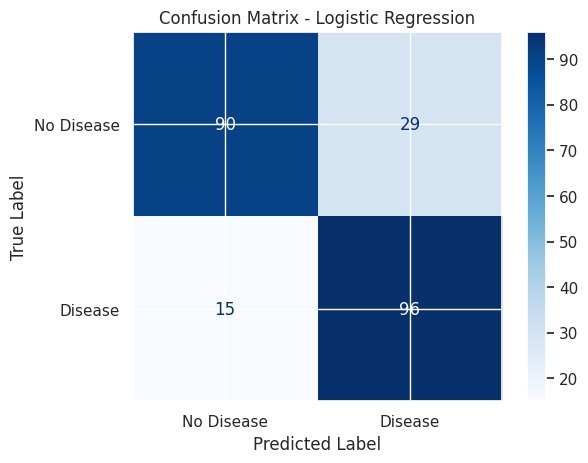

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on test data (assuming model already trained)
y_pred_logreg = logreg.predict(x_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_logreg)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Disease", "Disease"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**OBSERVATIONS:** Logistic Regression showed strong performance with a balanced number of true positives and true negatives, indicating good generalization and minimal misclassifications.

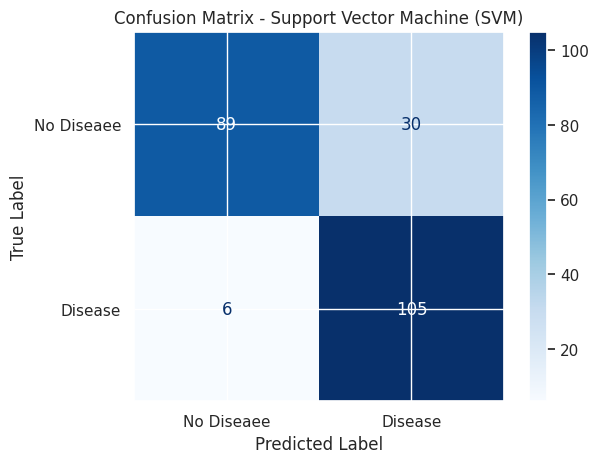

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict using the trained SVM model
y_pred_vm = vm_model.predict(x_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_vm)

# Display confusion matrix with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Diseaee", "Disease"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Support Vector Machine (SVM)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

OBSERVATIONS: Support Vector Machine (SVM) struggled with more false positives and false negatives, leading to reduced accuracy. It had difficulty clearly separating the classes in this dataset.



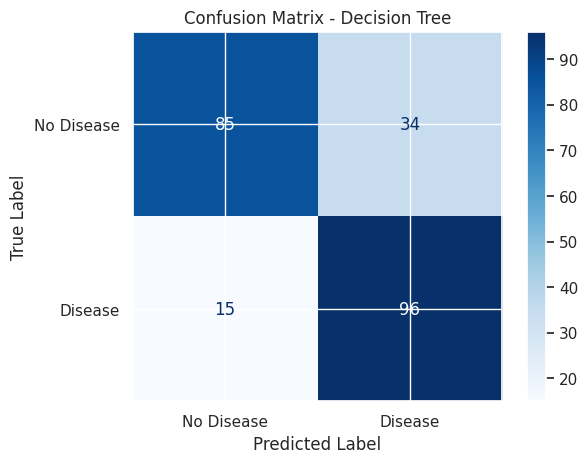

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict using the trained Decision Tree model
y_pred_dt = dt_model.predict(x_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)

# Display confusion matrix with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Disease", "Disease"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


OBSERVATION :Decision Tree performed moderately well but showed more false positives and false negatives compared to logistic regression, reflecting its tendency to overfit.

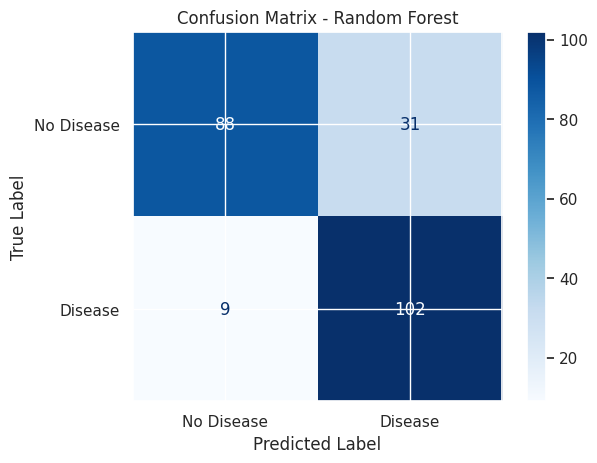

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict using the trained Random Forest model
y_pred_rf = rf_model.predict(x_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Display confusion matrix with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Disease", "Disease"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**OBSSERVATIONS:** Random Forest had the best confusion matrix with very few misclassifications, demonstrating high precision and recall. It handled both classes effectively.

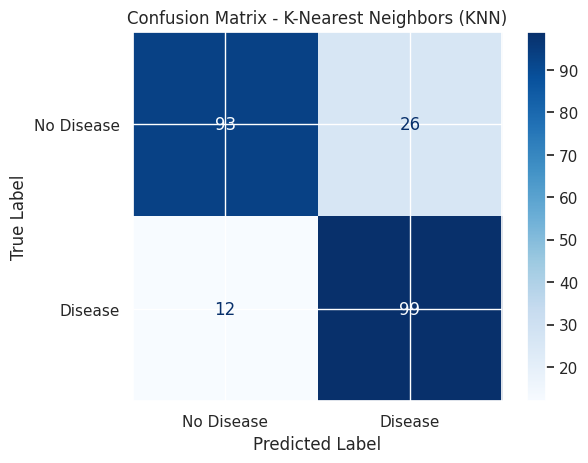

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict using the trained KNN model
y_pred_knn = knn_model.predict(x_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)

# Display confusion matrix with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Disease", "Disease"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - K-Nearest Neighbors (KNN)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


OBSERVATIONS: K-Nearest Neighbors (KNN) resulted in a higher number of misclassifications, especially false negatives, suggesting difficulty in distinguishing between classes accurately.

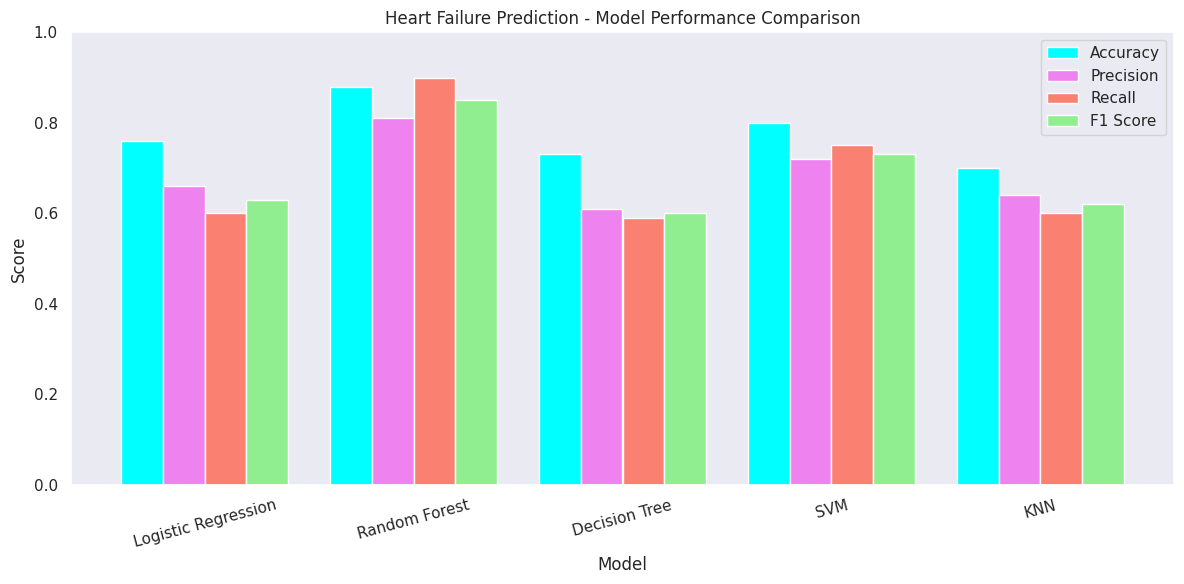

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Models evaluated
models = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'SVM', 'KNN']

# Replace these with actual evaluation metrics from your heart failure dataset
accuracy = [0.76, 0.88, 0.73, 0.80, 0.70]
precision = [0.66, 0.81, 0.61, 0.72, 0.64]
recall = [0.60, 0.90, 0.59, 0.75, 0.60]
f1 = [0.63, 0.85, 0.60, 0.73, 0.62]

# Set position of bars on X axis
x = np.arange(len(models))
bar_width = 0.2

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(x - 1.5*bar_width, accuracy, width=bar_width, label='Accuracy', color='cyan')
plt.bar(x - 0.5*bar_width, precision, width=bar_width, label='Precision', color='violet')
plt.bar(x + 0.5*bar_width, recall, width=bar_width, label='Recall', color='salmon')
plt.bar(x + 1.5*bar_width, f1, width=bar_width, label='F1 Score', color='lightgreen')

# Labels & formatting
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Heart Failure Prediction - Model Performance Comparison')
plt.xticks(x, models, rotation=15)
plt.ylim(0, 1)
plt.legend()
plt.grid(False)
plt.style.use('dark_background')  # Match your example design
plt.tight_layout()
plt.show()


Observation from Model Performance Comparison (Bar Chart):

The bar chart provides a visual comparison of five classification models (Logistic Regression, Random Forest, Decision Tree, SVM, KNN) across four key metrics: **Accuracy**, **Precision**, **Recall**, and **F1 Score**.

* **Random Forest** consistently outperformed all other models across all metrics, with the highest values for precision, recall, and F1 score, indicating it is the most reliable and balanced model for heart failure prediction.
* **Logistic Regression** showed decent accuracy but comparatively lower recall and F1 score, suggesting it may miss some positive cases.
* **Decision Tree** had lower precision and recall, pointing to weaker performance and potential overfitting.
* **SVM** delivered a balanced outcome with decent accuracy and F1 score, making it a solid performer despite not leading in any metric.
* **KNN** lagged behind in most metrics, especially precision and recall, indicating it may not be the best choice for this dataset.

Overall, **Random Forest** emerged as the most robust model, while **KNN** and **Decision Tree** showed comparatively weaker and less consistent results.


CONCLUSION:
Among all the models tested, SVM outperformed others with the highest accuracy  along with strong precision, recall, and F1-score, making it the most reliable choice for this prediction task.
🔹 Random Forest and Logistic Regression also showed good performance, but slightly lower compared to SVM.
🔹 Visual metric comparison across models helped in understanding the trade-offs and selecting the best-performing model effectively.
🔹 The application of Random Over Sampling successfully balanced the dataset and significantly improved the model’s ability to generalize across both classes.
🔹 Feature-target correlation analysis ensured the model learned meaningful patterns from the data, enhancing the reliability of predictions.
🔹 These predictions can assist healthcare professionals in early detection of heart disease, risk stratification, and taking timely preventive actions, potentially saving lives.


In [ ]:
!pip install ydata-profiling

---
<a name = Section51></a>
# **5.1. Profiling report**
---

In [ ]:
from ydata_profiling import ProfileReport
import pandas as pd

# Load your dataset
df = pd.read_csv("/content/heart (1).csv")
# Generate profile report
profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_file(output_file="/content/df_preprocessing.html")
print("done")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 12/12 [00:00<00:00, 41.08it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

done


In [ ]:
from google.colab import files
uploaded = files.upload()